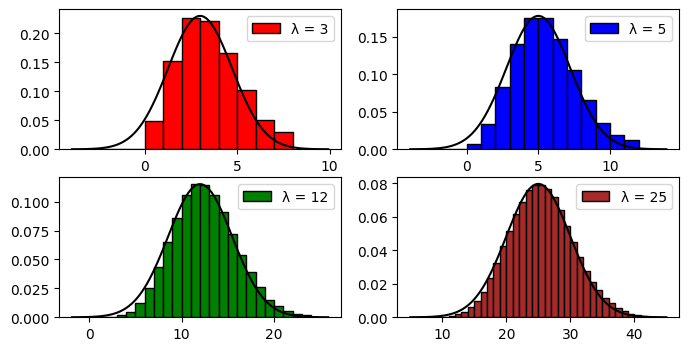

In [1]:
"""
Simulates Poisson samples and overlays normal approximations 
for various λ values.
"""

from scipy.stats import poisson, norm
import numpy as np
import matplotlib.pyplot as plt

# Different Poisson means (λ values) to compare
ps = [3, 5, 12, 25]

# Generate random samples for each λ
ys = [np.array(poisson.rvs(p, size=100000)) for p in ps]

# Function using new definition
def normal_superimposed(mu, sigma, points=100):
    nx = np.linspace(mu - 4*sigma, mu + 4*sigma, points)
    return mu, sigma, nx, norm.pdf(nx, mu, sigma)

colors = ['red', 'blue', 'green', 'brown']
fig, ax = plt.subplots(2, 2, figsize=(8, 4))

# Plot histogram and normal curve for each λ
for i, lam in enumerate(ps):
    r, c = divmod(i, 2)  # choose subplot position
    
    # Histogram range: ±4 standard deviations
    sd = np.sqrt(lam)
    l, h = int(lam - 4*sd), int(lam + 4*sd)
    bins = range(l, h)
    
    ax[r, c].hist(ys[i], bins=bins, color=colors[i], 
                  label=f'\u03BB = {lam}', density=True, 
                  histtype='bar', ec='black')
    ax[r, c].legend()
    
    # Overlay the normal approximation
    mu, sd, nx, ny = normal_superimposed(lam, sd)
    ax[r, c].plot(nx, ny, color='black')

fig.savefig('img/poisson_normal_approx.png')
plt.show()
